In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate, integrate
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation, UniformTriRefiner, CubicTriInterpolator, LinearTriInterpolator, TriInterpolator, TriAnalyzer

https://stackoverflow.com/questions/63220629/inverse-of-numpy-gradient-function

In [2]:
df = pd.read_excel('./Trial-Wireup 2.xlsx')

In [3]:
x = df['X'].to_numpy()
y = df['Y'].to_numpy()
t = df['Delay'].to_numpy()

In [4]:
r = np.stack([x, y]).T

In [5]:
#tri = Triangulation(x, y)

In [6]:
#S = LinearTriInterpolator(tri, t)

In [7]:
#S = interpolate.CloughTocher2DInterpolator(r, t)
#S = interpolate.LinearNDInterpolator(r, t)
#S = interpolate.NearestNDInterpolator(r, t)
S = interpolate.Rbf(x, y, t, epsilon=0.1, function='thin_plate')

In [8]:
N = 200
xl = np.linspace(x.min(), x.max(), N)
yl = np.linspace(y.min(), y.max(), N)
X, Y = np.meshgrid(xl, yl)

In [9]:
#tl = S(np.stack([X.ravel(), Y.ravel()]).T)
tl = S(X.ravel(), Y.ravel())

In [10]:
T = tl.reshape(X.shape)

In [11]:
#T = interpolate.griddata((x, y), t, (X, Y), method='linear')

In [12]:
DT = np.gradient(T, yl, xl, edge_order=1)

In [13]:
#DT = S.gradient(X.ravel(), Y.ravel())
#DT = [x.reshape(X.shape) for x in DT]

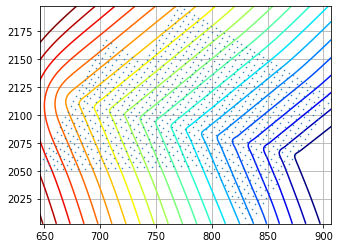

In [15]:
lt = np.linspace(0, 5000, 21)
axe = plt.contour(X, Y, T, lt, cmap='jet')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()

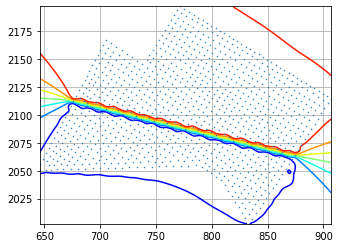

In [16]:
axe = plt.contour(X, Y, DT[0], cmap='jet')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()

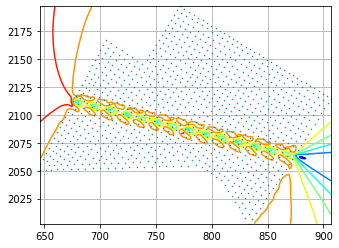

In [17]:
axe = plt.contour(X, Y, np.hypot(*DT), cmap='jet')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()

In [18]:
stepx = np.diff(xl)[0]
stepy = np.diff(yl)[0]

In [19]:
SdZx = np.nancumsum(DT[1], axis=1)*np.diff(xl)[0]
SdZy = np.nancumsum(DT[0], axis=0)*np.diff(yl)[0]

Zhat = np.zeros(SdZx.shape)
for i in range(Zhat.shape[0]):
    for j in range(Zhat.shape[1]):
        Zhat[i,j] += np.sum([SdZy[i,0], -SdZy[0,0], SdZx[i,j], -SdZx[i,0]])
        
Zhat += T[0,0] - Zhat[0,0]

In [20]:
np.all(np.isnan(Zhat))

False

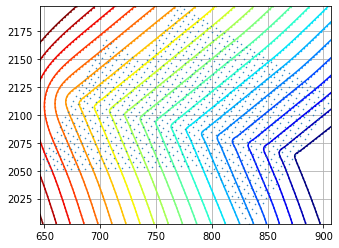

In [24]:
axe = plt.contour(X, Y, T, lt, cmap='jet')
axe = plt.contour(X, Y, Zhat, lt, cmap='jet', linestyles=':')
axe.axes.plot(x, y, '.', markersize=1)
axe.axes.set_aspect('equal')
axe.axes.grid()

NameError: name 'valintegral' is not defined

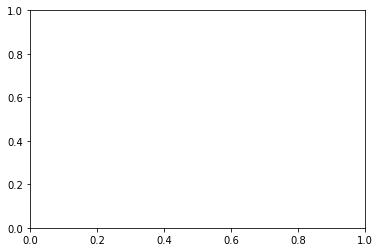

In [22]:
fig, axe = plt.subplots()
axe.plot(valintegral.data.ravel(), T.ravel(), '.', markersize=1)

In [ ]:
T